In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load Dataset
df = pd.read_csv("dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [20]:
# Basic Info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [21]:
# Missing values Check
df.isnull().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [22]:
# Clean the data 
df.dropna(inplace=True)

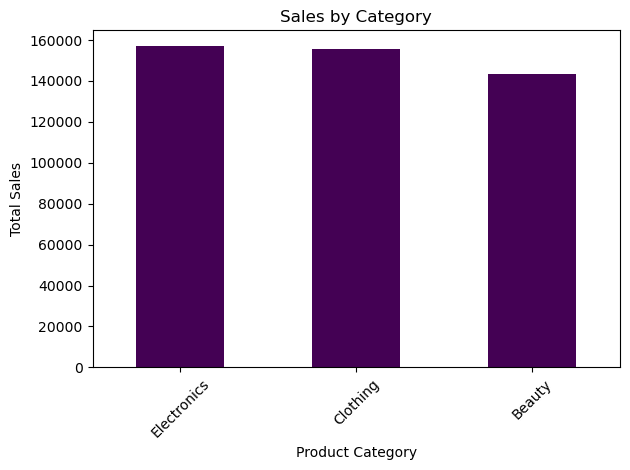

In [39]:
# Category-wise Sales
import matplotlib.pyplot as plt

category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

category_sales.plot(kind='bar', 
                    title='Sales by Category', 
                    colormap='viridis')

plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 600x400 with 0 Axes>

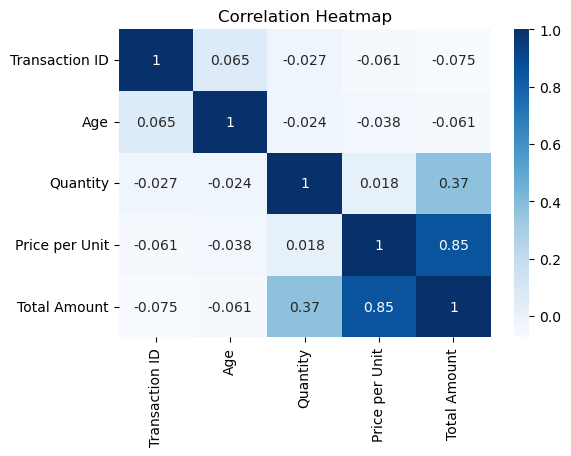

In [41]:
# correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')

plt.title('Correlation Heatmap')
plt.show()

In [51]:
print(df.columns)

Index(['Transaction ID', 'Customer ID', 'Gender', 'Age', 'Product Category',
       'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [47]:
for col in df.columns:
    if 'date' in col.lower():
        print(col)

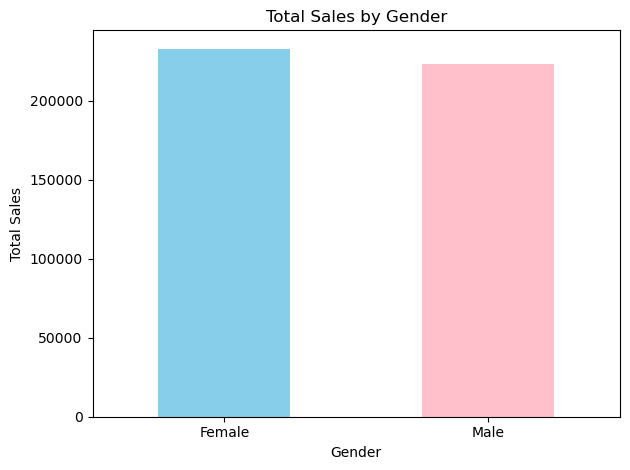

In [52]:
# Gender-wise Total Sales
gender_sales = df.groupby('Gender')['Total Amount'].sum()

gender_sales.plot(kind='bar', 
                  title='Total Sales by Gender', 
                  color=['skyblue', 'pink'])

plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

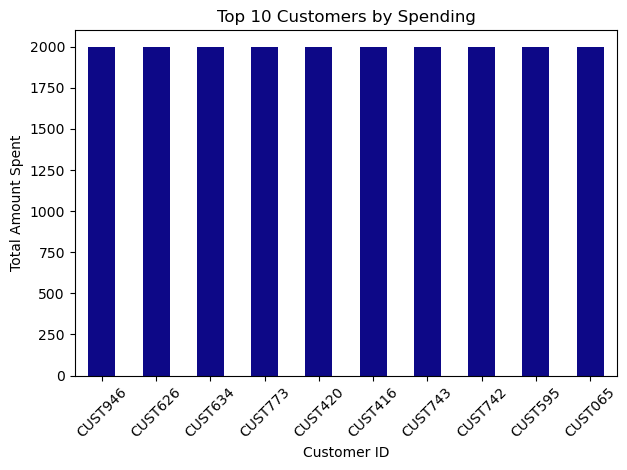

In [53]:
# Top 10 Customers by Total Amount Spent
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='bar', 
                   title='Top 10 Customers by Spending',
                   colormap='plasma')

plt.xlabel('Customer ID')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

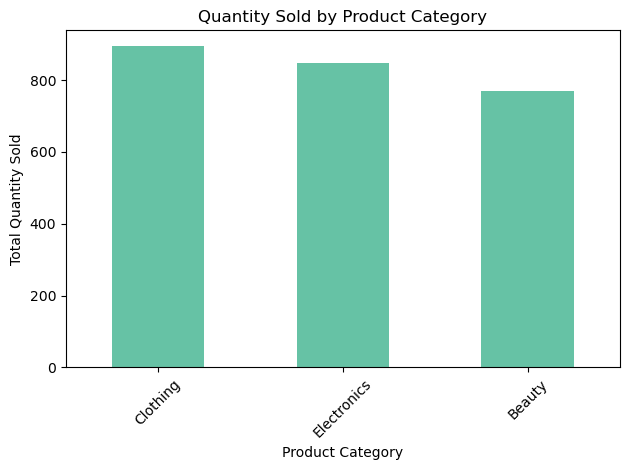

In [54]:
# Product Category-wise Quantity Sold
category_quantity = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

category_quantity.plot(kind='bar',
                       title='Quantity Sold by Product Category',
                       colormap='Set2')

plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
# Create Age Groups
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-60', '60+']
df['Age Group'] = pd.cut(df['Age'],
                         bins=bins, labels=labels)

C:\Users\ys702\AppData\Local\Temp\ipykernel_20028\880843174.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age Group')['Total Amount'].sum()


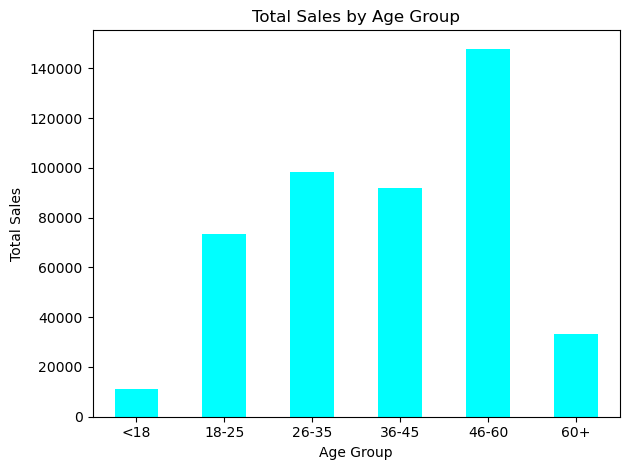

In [61]:
# Age Group-wise Total Sales
age_group_sales = df.groupby('Age Group')['Total Amount'].sum()

age_group_sales.plot(kind='bar',
                     title='Total Sales by Age Group',
                     colormap='cool')

plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\ys702\AppData\Local\Temp\ipykernel_20028\3455207929.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_sales = df.groupby(['Gender', 'Age Group'])['Total Amount'].sum().unstack()


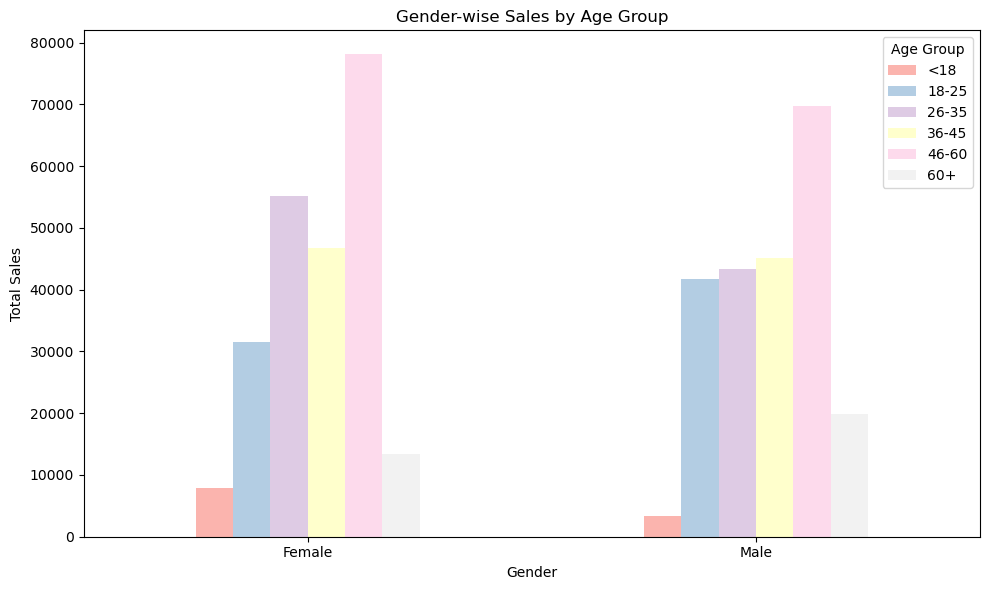

In [62]:
# Gender-wise Sales by Age Group
gender_age_sales = df.groupby(['Gender', 'Age Group'])['Total Amount'].sum().unstack()

gender_age_sales.plot(kind='bar',
                      figsize=(10, 6),
                      colormap='Pastel1',
                      title='Gender-wise Sales by Age Group')

plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()